In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('merged_keystroke.csv')



In [5]:
df.head()

,EID,key,direction,time,user
0,0,t,0,2017-04-14 18:57:12.176,1
1,1,t,1,2017-04-14 18:57:12.352,1
2,2,h,0,2017-04-14 18:57:12.399,1
3,3,h,1,2017-04-14 18:57:12.517,1
4,4,i,0,2017-04-14 18:57:12.762,1


In [6]:
df['key'].unique()

array(['t', 'h', 'i', 's', 'SPACE', 'a', 'e', 'o', 'b', 'BACKSPACE', 'f',
       'w', 'r', 'd', 'y', 'p', 'u', 'n', 'q', 'm', '.', 'c', 'l', '\n',
       'k', 'v', 'x', 'OTHER', 'M', 'g', ',', 'j', '4', '5', '7', '1',
       "'", '#', '6', '0', '3', 'P', 'H', 'D', '2', 'O', 'I', 'A', 'C',
       'Q', 'F', 'L', 'S', '!', 'T', '-', 'E', '?', 'B', 'N', 'U', ':',
       'G', ')', 'z', 'Y', '+', '*', '=', 'W', '8', '"', '@', '_', '9',
       '/', 'R', '$', ';', 'V', '(', 'X', 'J', 'K', '&', '>'],
      dtype=object)

In [7]:
df.rename(columns={"time": "keystroke_time"}, inplace=True)

In [8]:
# Step 1: Convert keystroke_time to datetime
df['keystroke_time'] = pd.to_datetime(df['keystroke_time'])

# Step 2: Initialize the new columns
df['keystroke_hold_time'] = pd.NaT
df['keystroke_release_time'] = pd.NaT

# Step 3: Compute the hold and release times
for i in range(len(df) - 2):
    hold = (df.loc[i+1, 'keystroke_time'] - df.loc[i, 'keystroke_time']).total_seconds() * 1000
    release = (df.loc[i+2, 'keystroke_time'] - df.loc[i+1, 'keystroke_time']).total_seconds() * 1000
    df.loc[i, 'keystroke_hold_time'] = hold
    df.loc[i, 'keystroke_release_time'] = release

df['keystroke_hold_time'].fillna(0, inplace=True)
df['keystroke_release_time'].fillna(0, inplace=True)

# Step 4: Drop even-indexed rows AFTER calculations
df = df[df.index % 2 == 0].reset_index(drop=True)







C:\Users\88019\AppData\Local\Temp\ipykernel_16096\259227977.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '176.0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.loc[i, 'keystroke_hold_time'] = hold
C:\Users\88019\AppData\Local\Temp\ipykernel_16096\259227977.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '47.0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.loc[i, 'keystroke_release_time'] = release
C:\Users\88019\AppData\Local\Temp\ipykernel_16096\259227977.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

In [9]:
df.head()

,EID,key,direction,keystroke_time,user,keystroke_hold_time,keystroke_release_time
0,0,t,0,2017-04-14 18:57:12.176,1,176.0,47.0
1,2,h,0,2017-04-14 18:57:12.399,1,118.0,245.0
2,4,i,0,2017-04-14 18:57:12.762,1,118.0,128.0
3,6,s,0,2017-04-14 18:57:13.008,1,106.0,210.0
4,8,SPACE,0,2017-04-14 18:57:13.324,1,109.0,910.0


In [10]:
df = df.drop(columns=['keystroke_time'])


In [11]:
df.head()

,EID,key,direction,user,keystroke_hold_time,keystroke_release_time
0,0,t,0,1,176.0,47.0
1,2,h,0,1,118.0,245.0
2,4,i,0,1,118.0,128.0
3,6,s,0,1,106.0,210.0
4,8,SPACE,0,1,109.0,910.0


In [12]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Embedding

# Encode string keys like 't', 'h', 'SPACE' etc.
key_encoder = LabelEncoder()
df['Key_encoded'] = key_encoder.fit_transform(df['key'])

# Get number of unique keys
num_unique_keys = df['Key_encoded'].nunique()

# Example: Embedding layer setup


embedding_layer = Embedding(input_dim=num_unique_keys, output_dim=32)


In [13]:
df = df.drop(columns=['EID', 'key', 'direction'])

In [14]:
df.head()

,user,keystroke_hold_time,keystroke_release_time,Key_encoded
0,1,176.0,47.0,79
1,1,118.0,245.0,67
2,1,118.0,128.0,68
3,1,106.0,210.0,78
4,1,109.0,910.0,52


In [15]:
df.describe()

,user,keystroke_hold_time,keystroke_release_time,Key_encoded
count,471966.000000,4.719660e+05,4.719660e+05,471966.000000
mean,50.349881,3.051160e+03,6.446512e+03,62.593818
std,28.827609,6.757569e+05,1.282162e+06,15.763320
min,1.000000,-9.541848e+07,-4.273288e+06,0.000000
25%,25.000000,7.300000e+01,7.400000e+01,52.000000
50%,50.000000,9.600000e+01,1.000000e+02,65.000000
75%,75.000000,1.400000e+02,1.610000e+02,74.000000
max,100.000000,2.552214e+08,6.136896e+08,85.000000


In [16]:
df.isnull().sum()


user                      0
keystroke_hold_time       0
keystroke_release_time    0
Key_encoded               0
dtype: int64

In [17]:
df.head(10)

,user,keystroke_hold_time,keystroke_release_time,Key_encoded
0,1,176.0,47.0,79
1,1,118.0,245.0,67
2,1,118.0,128.0,68
3,1,106.0,210.0,78
4,1,109.0,910.0,52
5,1,117.0,116.0,68
6,1,107.0,395.0,78
7,1,107.0,394.0,52
8,1,105.0,35.0,60
9,1,95.0,425.0,52


In [18]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

numeric_cols = ['keystroke_hold_time', 'keystroke_release_time']

outlier_counts = {}
total_rows = len(df)

scaling_strategy = {}  # Store which scaler to use for each column

# Determine outlier stats and appropriate scaler
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / total_rows) * 100

    outlier_counts[col] = {
        'outlier_count': outlier_count,
        'outlier_percentage': outlier_percentage
    }

    # Decide which scaler to apply
    if outlier_percentage <= 5:
        scaling_strategy[col] = 'minmax'
    else:
        scaling_strategy[col] = 'robust'

# Print decisions
print("📊 Scaling Strategy Based on Outlier Percentage:")
for col in numeric_cols:
    print(f"{col}: {outlier_counts[col]['outlier_percentage']:.2f}% outliers → {scaling_strategy[col].capitalize()}Scaler")

# Apply scalers accordingly
for col in numeric_cols:
    if scaling_strategy[col] == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = RobustScaler()

    df[[col]] = scaler.fit_transform(df[[col]])


📊 Scaling Strategy Based on Outlier Percentage:
keystroke_hold_time: 11.76% outliers → RobustScaler
keystroke_release_time: 12.52% outliers → RobustScaler


In [19]:
df.head(20)

,user,keystroke_hold_time,keystroke_release_time,Key_encoded
0,1,1.194030,-0.609195,79
1,1,0.328358,1.666667,67
2,1,0.328358,0.321839,68
3,1,0.149254,1.264368,78
4,1,0.194030,9.310345,52
5,1,0.313433,0.183908,68
6,1,0.164179,3.390805,78
7,1,0.164179,3.379310,52
8,1,0.134328,-0.747126,60
9,1,-0.014925,3.735632,52


In [20]:
df.to_csv('C:\\Users\\88019\Downloads\\p2\\BB-MAS_Dataset (keystroke and swipe)\BB-MAS_Dataset\\output_keystroke.csv', index=False)

In [21]:
SEQUENCE_LENGTH = 20

def create_keystroke_sequences(df, user_col='user'):
    sequences = []
    labels = []
    for user_id, user_group in df.groupby(user_col):
        # Extract relevant columns as numpy array
        user_data = user_group[['keystroke_hold_time', 'keystroke_release_time', 'Key_encoded']].values
        for i in range(0, len(user_data) - SEQUENCE_LENGTH + 1):
            seq = user_data[i:i + SEQUENCE_LENGTH]
            sequences.append(seq)
            labels.append(user_id)
    return np.array(sequences), np.array(labels)

# Assuming your keystroke dataframe is named keystroke_df
X_keystroke, y_keystroke = create_keystroke_sequences(df)


In [22]:
# Maximum values of each column
max_values = df.max()

# Minimum values of each column
min_values = df.min()

print(max_values)
print(min_values)



user                      1.000000e+02
keystroke_hold_time       3.809274e+06
keystroke_release_time    7.053902e+06
Key_encoded               8.500000e+01
dtype: float64
user                      1.000000e+00
keystroke_hold_time      -1.424158e+06
keystroke_release_time   -4.911940e+04
Key_encoded               0.000000e+00
dtype: float64


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10, 3)]      0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 10, 3)]      0           []                               
                                                                                                  
 model (Functional)             (None, 64)           17408       ['input_2[0][0]',                
                                                                  'input_3[0][0]']                
                                                                                                  
 lambda (Lambda)                (None, 64)           0           ['model[0][0]',            

c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128306 (\N{BLACK SQUARE BUTTON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


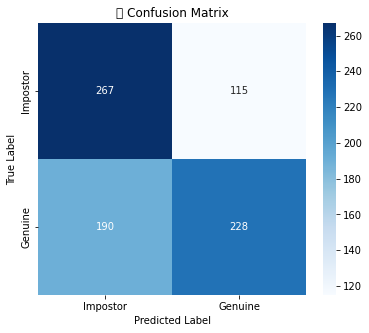


🔢 Additional Metrics:
Precision: 0.6647
Recall:    0.5455
F1 Score:  0.5992
Accuracy:  0.6188


c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


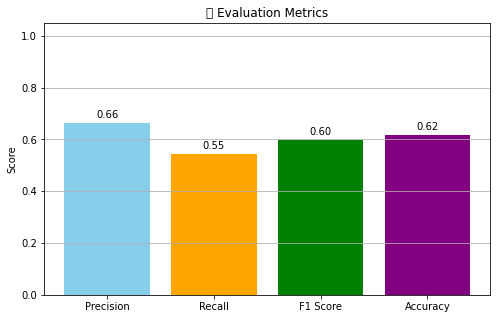

C:\Users\88019\AppData\Local\Temp\ipykernel_16096\1139828933.py:185: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\88019\AppData\Local\Temp\ipykernel_16096\1139828933.py:185: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


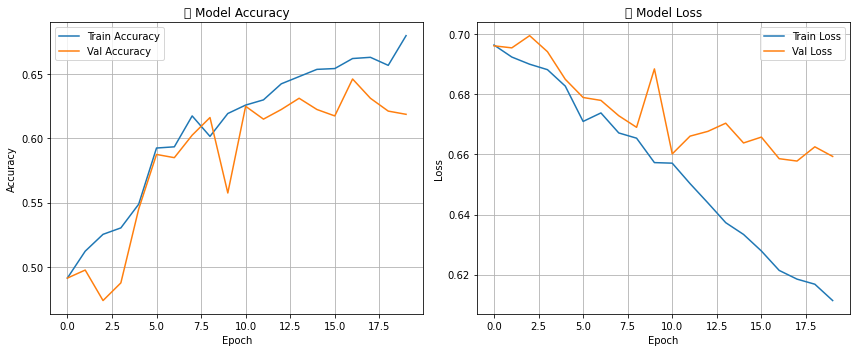

c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


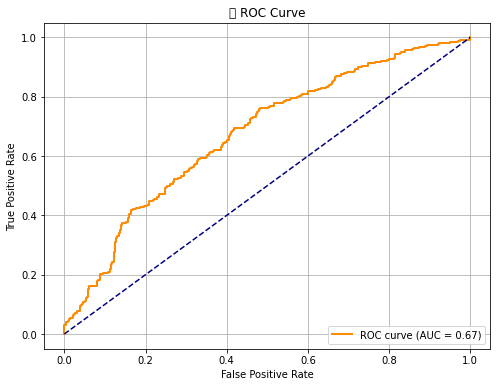

17/17 [==============================] - 2s 5ms/step

🔍 Test similarity scores with user 13:
Sample 1: 19.70% → ❌ Not a match
Sample 2: 18.23% → ❌ Not a match
Sample 3: 15.99% → ❌ Not a match
Sample 4: 14.66% → ❌ Not a match
Sample 5: 15.99% → ❌ Not a match
Sample 6: 16.14% → ❌ Not a match
Sample 7: 28.60% → ❌ Not a match
Sample 8: 31.47% → ❌ Not a match
Sample 9: 21.73% → ❌ Not a match
Sample 10: 49.65% → ❌ Not a match
Sample 11: 23.80% → ❌ Not a match
Sample 12: 15.52% → ❌ Not a match
Sample 13: 27.85% → ❌ Not a match
Sample 14: 30.41% → ❌ Not a match
Sample 15: 15.83% → ❌ Not a match
Sample 16: 13.27% → ❌ Not a match
Sample 17: 28.94% → ❌ Not a match
Sample 18: 16.49% → ❌ Not a match
Sample 19: 14.77% → ❌ Not a match
Sample 20: 13.89% → ❌ Not a match
Sample 21: 14.08% → ❌ Not a match
Sample 22: 28.93% → ❌ Not a match
Sample 23: 8.29% → ❌ Not a match
Sample 24: 15.49% → ❌ Not a match
Sample 25: 19.25% → ❌ Not a match
Sample 26: 20.36% → ❌ Not a match
Sample 27: 22.73% → ❌ Not a match

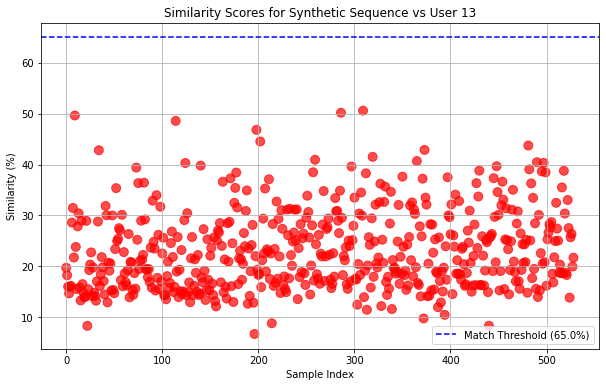

In [23]:
# Siamese LSTM unbiased for Keystroke Dynamics with Confusion Matrix Plot

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix,
    precision_score, recall_score, f1_score,
    accuracy_score, roc_curve, auc
)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --------------------------
# Load & Process Data
# --------------------------
# Ensure your DataFrame `df` is defined before this block
features = ['keystroke_hold_time', 'keystroke_release_time', 'Key_encoded']
grouped = df.groupby('user')
user_sequences = {}
step = 10

for user, group in grouped:
    data = group[features].values
    sequences = [data[i:i+step] for i in range(0, len(data) - step + 1, step)]
    if len(sequences) >= 2:
        user_sequences[user] = sequences

def create_pairs(user_sequences, max_pairs=1000):
    pairs = []
    labels = []
    users = list(user_sequences.keys())

    for _ in range(max_pairs):
        # Positive pair
        user = random.choice(users)
        seqs = user_sequences[user]
        if len(seqs) >= 2:
            a, b = random.sample(seqs, 2)
            pairs.append([a, b])
            labels.append(1)

        # Negative pair
        user1, user2 = random.sample(users, 2)
        a = random.choice(user_sequences[user1])
        b = random.choice(user_sequences[user2])
        pairs.append([a, b])
        labels.append(0)

    return np.array(pairs), np.array(labels)

pairs, labels = create_pairs(user_sequences, max_pairs=2000)

# Padding
max_len = max(max(len(p[0]), len(p[1])) for p in pairs)
X1 = pad_sequences([p[0] for p in pairs], maxlen=max_len, dtype='float32')
X2 = pad_sequences([p[1] for p in pairs], maxlen=max_len, dtype='float32')

# Train-test split
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(
    X1, X2, labels, test_size=0.2, random_state=42
)

# --------------------------
# Siamese LSTM Model
# --------------------------
input_shape = (max_len, len(features))

def build_lstm_branch(input_shape):
    inp = Input(shape=input_shape)
    x = LSTM(64)(inp)
    return Model(inputs=inp, outputs=x)

lstm_branch = build_lstm_branch(input_shape)

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

encoded_a = lstm_branch(input_a)
encoded_b = lstm_branch(input_b)

L1_layer = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))
L1_distance = L1_layer([encoded_a, encoded_b])

output = Dense(1, activation='sigmoid')(L1_distance)

model = Model(inputs=[input_a, input_b], outputs=output)
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

model.summary()

# --------------------------
# Train the Model
# --------------------------
history = model.fit(
    [X1_train, X2_train],
    y_train,
    validation_data=([X1_test, X2_test], y_test),
    epochs=20,
    batch_size=32
)

model.save('siamese_lstm_model_keystroke.h5')

# --------------------------
# Evaluate Model
# --------------------------
y_pred_prob = model.predict([X1_test, X2_test])
y_pred_class = (y_pred_prob > 0.5).astype(int).flatten()

print("\n📈 Classification Report:")
print(classification_report(y_test, y_pred_class, digits=4))

# Confusion Matrix (Text and Plot)
cm = confusion_matrix(y_test, y_pred_class)
print("🧮 Confusion Matrix:")
print(cm)

# 🔲 Confusion Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Impostor", "Genuine"], yticklabels=["Impostor", "Genuine"])
plt.title("🔲 Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Additional Metrics
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)

print("\n🔢 Additional Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Accuracy:  {accuracy:.4f}")

# --------------------------
# Bar Chart: Evaluation Metrics
# --------------------------
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values = [precision, recall, f1, accuracy]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['skyblue', 'orange', 'green', 'purple'])
plt.ylim(0, 1.05)
plt.title('📊 Evaluation Metrics')
plt.ylabel('Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')
plt.grid(axis='y')
plt.show()

# --------------------------
# Accuracy & Loss Curves
# --------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('📈 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('📉 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --------------------------
# ROC Curve
# --------------------------
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📊 ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# --------------------------
# Synthetic Test Sequence Matching
# --------------------------
target_user = 13
user_samples = user_sequences[target_user]
user_samples_padded = pad_sequences(user_samples, maxlen=max_len, dtype='float32')

# Feature range definitions
feature_ranges = {
    'keystroke_hold_time': (-1.424158e+00, 3.809274e+06),
    'keystroke_release_time': (-4.911940e+04, 7.053902e+06),
    'Key_encoded': (0.000000e+00, 8.500000e+01),
}

random_sequence = np.array([
    [np.random.uniform(low, high) for low, high in feature_ranges.values()]
    for _ in range(step)
], dtype='float32')

new_sequence_padded = pad_sequences([random_sequence], maxlen=max_len, dtype='float32')[0]
test_batch = np.repeat(new_sequence_padded[None, :], len(user_samples_padded), axis=0)

similarities = model.predict([test_batch, user_samples_padded])
percentages = similarities.flatten() * 100

match_threshold = 65.00
match_count = sum(p >= match_threshold for p in percentages)

print(f"\n🔍 Test similarity scores with user {target_user}:")
for i, p in enumerate(percentages):
    verdict = "✅ Match" if p >= match_threshold else "❌ Not a match"
    print(f"Sample {i+1}: {p:.2f}% → {verdict}")

print("\n📊 Summary Report:")
print(f"Total samples compared: {len(percentages)}")
print(f"Matches found: {match_count}")
print(f"Match threshold: {match_threshold:.2f}%")

# Plot match results
plt.figure(figsize=(10, 6))
colors = ['green' if p >= match_threshold else 'red' for p in percentages]
plt.scatter(range(len(percentages)), percentages, c=colors, alpha=0.7, s=80)
plt.axhline(match_threshold, color='blue', linestyle='--', label=f'Match Threshold ({match_threshold}%)')
plt.title(f'Similarity Scores for Synthetic Sequence vs User {target_user}')
plt.xlabel('Sample Index')
plt.ylabel('Similarity (%)')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/20
100/100 [==============================] - 8s 26ms/step - loss: 0.6938 - accuracy: 0.5097 - val_loss: 0.6906 - val_accuracy: 0.4963
Epoch 2/20
100/100 [==============================] - 1s 9ms/step - loss: 0.6866 - accuracy: 0.5362 - val_loss: 0.6852 - val_accuracy: 0.5575
Epoch 3/20
100/100 [==============================] - 1s 8ms/step - loss: 0.6778 - accuracy: 0.5772 - val_loss: 0.6793 - val_accuracy: 0.5975
Epoch 4/20
100/100 [==============================] - 1s 7ms/step - loss: 0.6676 - accuracy: 0.6209 - val_loss: 0.6794 - val_accuracy: 0.5838
Epoch 5/20
100/100 [==============================] - 1s 8ms/step - loss: 0.6678 - accuracy: 0.6084 - val_loss: 0.6732 - val_accuracy: 0.6137
Epoch 6/20
100/100 [==============================] - 1s 8ms/step - loss: 0.6592 - accuracy: 0.6187 - val_loss: 0.6724 - val_accuracy: 0.6263
Epoch 7/20
100/100 [==============================] - 1s 9ms/step - loss: 0.6564 - accuracy: 0.6250 - val_loss: 0.6676 - val_accuracy: 0.6263
Epoch

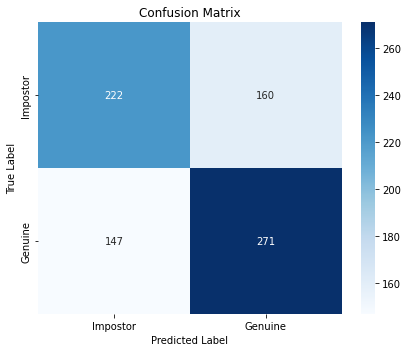

c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


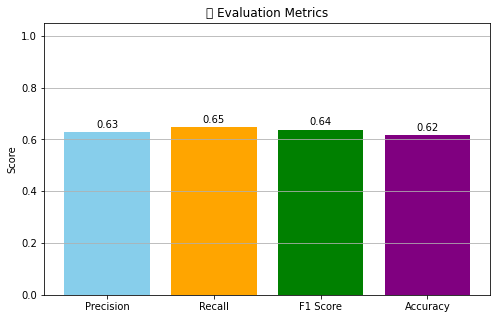

C:\Users\88019\AppData\Local\Temp\ipykernel_16096\4173069520.py:147: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\88019\AppData\Local\Temp\ipykernel_16096\4173069520.py:147: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


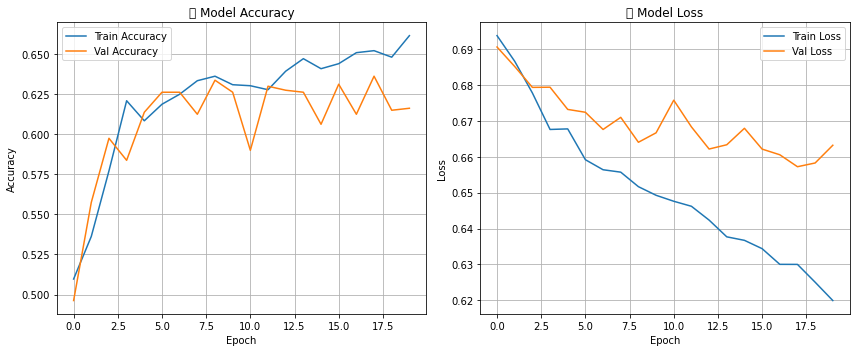

c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


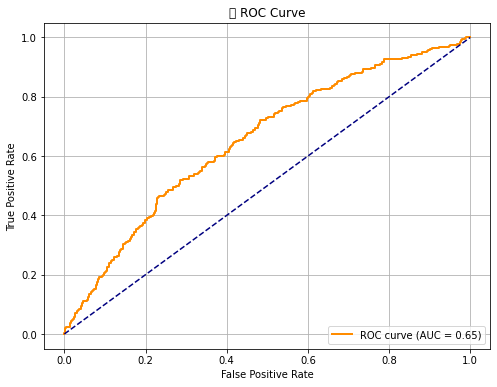

17/17 [==============================] - 1s 4ms/step

🔍 Test similarity scores with user 13:
Sample 1: 63.01% → ❌ Not a match
Sample 2: 55.61% → ❌ Not a match
Sample 3: 58.01% → ❌ Not a match
Sample 4: 58.83% → ❌ Not a match
Sample 5: 55.92% → ❌ Not a match
Sample 6: 55.71% → ❌ Not a match
Sample 7: 58.62% → ❌ Not a match
Sample 8: 66.44% → ✅ Match
Sample 9: 59.54% → ❌ Not a match
Sample 10: 31.99% → ❌ Not a match
Sample 11: 60.27% → ❌ Not a match
Sample 12: 56.61% → ❌ Not a match
Sample 13: 48.12% → ❌ Not a match
Sample 14: 48.63% → ❌ Not a match
Sample 15: 54.62% → ❌ Not a match
Sample 16: 55.41% → ❌ Not a match
Sample 17: 44.09% → ❌ Not a match
Sample 18: 56.49% → ❌ Not a match
Sample 19: 52.36% → ❌ Not a match
Sample 20: 55.96% → ❌ Not a match
Sample 21: 57.29% → ❌ Not a match
Sample 22: 49.98% → ❌ Not a match
Sample 23: 60.48% → ❌ Not a match
Sample 24: 55.40% → ❌ Not a match
Sample 25: 55.31% → ❌ Not a match
Sample 26: 63.02% → ❌ Not a match
Sample 27: 59.05% → ❌ Not a match
Samp

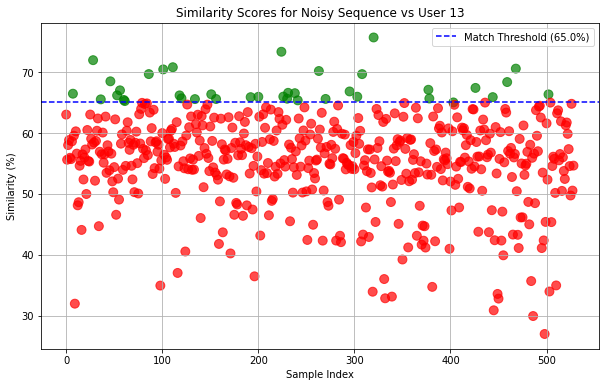

In [24]:
#Siamese LSTM biased with Confusion Matrix Plot

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, precision_score, recall_score,
    f1_score, accuracy_score, roc_curve, auc
)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --------------- Data Preparation ---------------
features = ['keystroke_hold_time', 'keystroke_release_time', 'Key_encoded']
grouped = df.groupby('user')
user_sequences = {}
step = 10

for user, group in grouped:
    data = group[features].values
    sequences = [data[i:i+step] for i in range(0, len(data) - step + 1, step)]
    if len(sequences) >= 2:
        user_sequences[user] = sequences

def create_pairs(user_sequences, max_pairs=1000):
    pairs = []
    labels = []
    users = list(user_sequences.keys())

    for _ in range(max_pairs):
        user = random.choice(users)
        seqs = user_sequences[user]
        if len(seqs) >= 2:
            a, b = random.sample(seqs, 2)
            pairs.append([a, b])
            labels.append(1)

        user1, user2 = random.sample(users, 2)
        a = random.choice(user_sequences[user1])
        b = random.choice(user_sequences[user2])
        pairs.append([a, b])
        labels.append(0)

    return np.array(pairs), np.array(labels)

pairs, labels = create_pairs(user_sequences, max_pairs=2000)

max_len = max(max(len(p[0]), len(p[1])) for p in pairs)
X1 = pad_sequences([p[0] for p in pairs], maxlen=max_len, dtype='float32')
X2 = pad_sequences([p[1] for p in pairs], maxlen=max_len, dtype='float32')

X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(
    X1, X2, labels, test_size=0.2, random_state=42
)

# --------------- Model Definition ---------------
input_shape = (max_len, len(features))

def build_lstm_branch(input_shape):
    inp = Input(shape=input_shape)
    x = LSTM(64)(inp)
    return Model(inputs=inp, outputs=x)

lstm_branch = build_lstm_branch(input_shape)
input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)
encoded_a = lstm_branch(input_a)
encoded_b = lstm_branch(input_b)

L1_layer = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))
L1_distance = L1_layer([encoded_a, encoded_b])
output = Dense(1, activation='sigmoid')(L1_distance)

model = Model(inputs=[input_a, input_b], outputs=output)
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

history = model.fit(
    [X1_train, X2_train], y_train,
    validation_data=([X1_test, X2_test], y_test),
    epochs=20, batch_size=32
)

# --------------- Evaluation ---------------
y_pred_prob = model.predict([X1_test, X2_test])
y_pred_class = (y_pred_prob > 0.5).astype(int).flatten()

print("\n📈 Classification Report:")
print(classification_report(y_test, y_pred_class, digits=4))

cm = confusion_matrix(y_test, y_pred_class)


# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Impostor', 'Genuine'], yticklabels=['Impostor', 'Genuine'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Additional Metrics
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)

# Bar Chart: Evaluation Metrics
plt.figure(figsize=(8, 5))
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values = [precision, recall, f1, accuracy]
bars = plt.bar(metrics, values, color=['skyblue', 'orange', 'green', 'purple'])
plt.ylim(0, 1.05)
plt.title('📊 Evaluation Metrics')
plt.ylabel('Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')
plt.grid(axis='y')
plt.show()

# Accuracy & Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('📈 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('📉 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📊 ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# --------------------------
# Noisy Real Sequence Testing
# --------------------------
target_user = 13
user_samples = user_sequences[target_user]
user_samples_padded = pad_sequences(user_samples, maxlen=max_len, dtype='float32')

base_sequence = random.choice(user_samples)
noise_std = 0.05
new_sequence = base_sequence + np.random.normal(0, noise_std, base_sequence.shape)
new_sequence_padded = pad_sequences([new_sequence], maxlen=max_len, dtype='float32')[0]
test_batch = np.repeat(new_sequence_padded[None, :], len(user_samples_padded), axis=0)

similarities = model.predict([test_batch, user_samples_padded])
percentages = similarities.flatten() * 100

match_threshold = 65.00
match_count = sum(p >= match_threshold for p in percentages)

print(f"\n🔍 Test similarity scores with user {target_user}:")
for i, p in enumerate(percentages):
    verdict = "✅ Match" if p >= match_threshold else "❌ Not a match"
    print(f"Sample {i+1}: {p:.2f}% → {verdict}")

print("\n📊 Summary Report:")
print(f"Total samples compared: {len(percentages)}")
print(f"Matches found: {match_count}")
print(f"Match threshold: {match_threshold:.2f}%")

plt.figure(figsize=(10, 6))
colors = ['green' if p >= match_threshold else 'red' for p in percentages]
plt.scatter(range(len(percentages)), percentages, c=colors, alpha=0.7, s=80)
plt.axhline(match_threshold, color='blue', linestyle='--', label=f'Match Threshold ({match_threshold}%)')
plt.title(f'Similarity Scores for Noisy Sequence vs User {target_user}')
plt.xlabel('Sample Index')
plt.ylabel('Similarity (%)')
plt.legend()
plt.grid(True)
plt.show()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 10, 3)]      0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 10, 3)]      0           []                               
                                                                                                  
 model_4 (Functional)           (None, 64)           13248       ['input_8[0][0]',                
                                                                  'input_9[0][0]']                
                                                                                                  
 lambda_2 (Lambda)              (None, 64)           0           ['model_4[0][0]',          

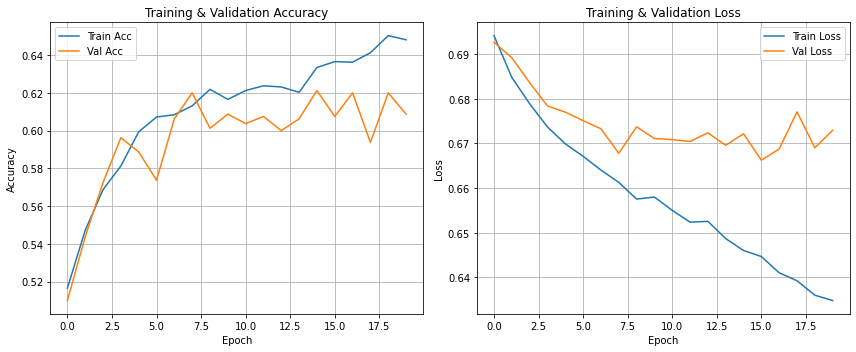

25/25 [==============================] - 2s 4ms/step

📈 Classification Report:
              precision    recall  f1-score   support

           0     0.6030    0.5288    0.5635       382
           1     0.6129    0.6818    0.6455       418

    accuracy                         0.6088       800
   macro avg     0.6079    0.6053    0.6045       800
weighted avg     0.6082    0.6088    0.6063       800

🧲 Confusion Matrix:


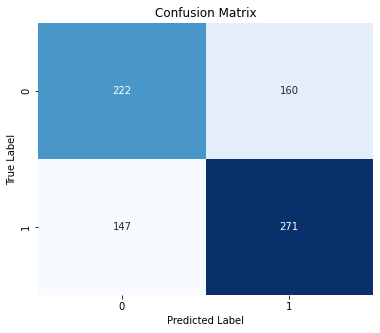

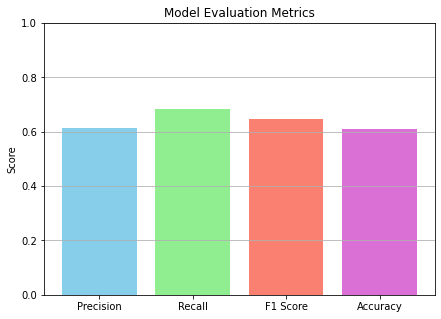

c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


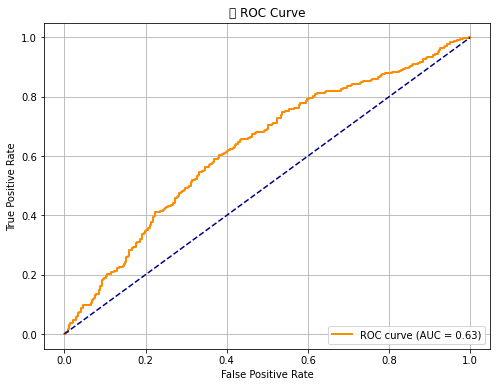

17/17 [==============================] - 1s 4ms/step

🔍 Test similarity scores with user 13:
Sample 1: 24.85% → ❌ Not a match
Sample 2: 21.13% → ❌ Not a match
Sample 3: 30.13% → ❌ Not a match
Sample 4: 20.17% → ❌ Not a match
Sample 5: 20.65% → ❌ Not a match
Sample 6: 26.25% → ❌ Not a match
Sample 7: 15.04% → ❌ Not a match
Sample 8: 17.54% → ❌ Not a match
Sample 9: 25.11% → ❌ Not a match
Sample 10: 19.63% → ❌ Not a match
Sample 11: 31.83% → ❌ Not a match
Sample 12: 26.91% → ❌ Not a match
Sample 13: 28.33% → ❌ Not a match
Sample 14: 19.82% → ❌ Not a match
Sample 15: 22.13% → ❌ Not a match
Sample 16: 38.18% → ❌ Not a match
Sample 17: 31.10% → ❌ Not a match
Sample 18: 23.23% → ❌ Not a match
Sample 19: 20.73% → ❌ Not a match
Sample 20: 27.13% → ❌ Not a match
Sample 21: 24.36% → ❌ Not a match
Sample 22: 30.64% → ❌ Not a match
Sample 23: 24.05% → ❌ Not a match
Sample 24: 20.85% → ❌ Not a match
Sample 25: 29.93% → ❌ Not a match
Sample 26: 15.42% → ❌ Not a match
Sample 27: 25.34% → ❌ Not a matc

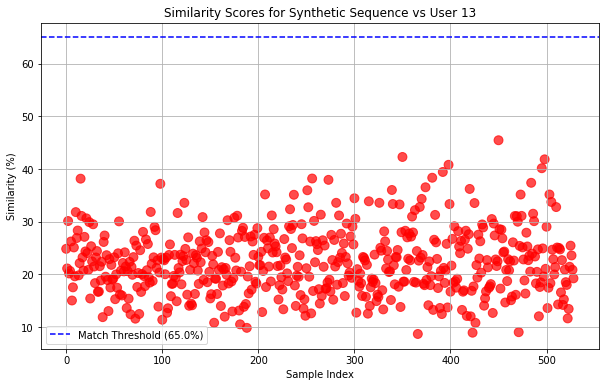

In [25]:
#Siamese GRU unbiased 

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, precision_score, recall_score,
    f1_score, accuracy_score, roc_curve, auc
)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns  # For confusion matrix plot

# --------------------------
# Prepare User Sequences
# --------------------------
features = ['keystroke_hold_time', 'keystroke_release_time', 'Key_encoded']
grouped = df.groupby('user')
user_sequences = {}
step = 10

for user, group in grouped:
    data = group[features].values
    sequences = [data[i:i+step] for i in range(0, len(data) - step + 1, step)]
    if len(sequences) >= 2:
        user_sequences[user] = sequences

# --------------------------
# Create Positive & Negative Pairs
# --------------------------
def create_pairs(user_sequences, max_pairs=1000):
    pairs, labels = [], []
    users = list(user_sequences.keys())

    for _ in range(max_pairs):
        # Positive pair
        user = random.choice(users)
        seqs = user_sequences[user]
        if len(seqs) >= 2:
            a, b = random.sample(seqs, 2)
            pairs.append([a, b])
            labels.append(1)

        # Negative pair
        user1, user2 = random.sample(users, 2)
        a = random.choice(user_sequences[user1])
        b = random.choice(user_sequences[user2])
        pairs.append([a, b])
        labels.append(0)

    return np.array(pairs), np.array(labels)

pairs, labels = create_pairs(user_sequences, max_pairs=2000)

# --------------------------
# Padding Sequences
# --------------------------
max_len = max(max(len(p[0]), len(p[1])) for p in pairs)
X1 = pad_sequences([p[0] for p in pairs], maxlen=max_len, dtype='float32')
X2 = pad_sequences([p[1] for p in pairs], maxlen=max_len, dtype='float32')

# --------------------------
# Train-test Split
# --------------------------
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(
    X1, X2, labels, test_size=0.2, random_state=42
)

# --------------------------
# Siamese GRU Model
# --------------------------
input_shape = (max_len, len(features))

def build_gru_branch(input_shape):
    inp = Input(shape=input_shape)
    x = GRU(64)(inp)
    return Model(inputs=inp, outputs=x)

gru_branch = build_gru_branch(input_shape)

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

encoded_a = gru_branch(input_a)
encoded_b = gru_branch(input_b)

L1_layer = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))
L1_distance = L1_layer([encoded_a, encoded_b])

output = Dense(1, activation='sigmoid')(L1_distance)

model = Model(inputs=[input_a, input_b], outputs=output)
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

model.summary()

# --------------------------
# Train the Model
# --------------------------
history = model.fit(
    [X1_train, X2_train], y_train,
    validation_data=([X1_test, X2_test], y_test),
    epochs=20,
    batch_size=32
)

model.save('siamese_gru_model_keystroke.h5')

# --------------------------
# Training Accuracy/Loss Curves
# --------------------------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------------------
# Evaluation Metrics
# --------------------------
y_pred_prob = model.predict([X1_test, X2_test])
y_pred_class = (y_pred_prob > 0.5).astype(int).flatten()

print("\n📈 Classification Report:")
print(classification_report(y_test, y_pred_class, digits=4))

print("🧲 Confusion Matrix:")


# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision, Recall, F1, Accuracy
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)

# Bar Chart
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
scores = [precision, recall, f1, accuracy]

plt.figure(figsize=(7, 5))
plt.bar(metrics, scores, color=['skyblue', 'lightgreen', 'salmon', 'orchid'])
plt.ylim(0, 1)
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📊 ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# --------------------------
# Synthetic Test Sequence Match
# --------------------------
target_user = 13
user_samples = user_sequences[target_user]
user_samples_padded = pad_sequences(user_samples, maxlen=max_len, dtype='float32')

# Updated feature ranges from user-provided min/max values
feature_ranges = {
    'keystroke_hold_time': (-1.424158e+00, 3.809274e+06),
    'keystroke_release_time': (-4.911940e+04, 7.053902e+06),
    'Key_encoded': (0.000000e+00, 8.500000e+01),
}

random_sequence = np.array([
    [np.random.uniform(low, high) for low, high in feature_ranges.values()]
    for _ in range(step)
], dtype='float32')

new_sequence_padded = pad_sequences([random_sequence], maxlen=max_len, dtype='float32')[0]
test_batch = np.repeat(new_sequence_padded[None, :], len(user_samples_padded), axis=0)

similarities = model.predict([test_batch, user_samples_padded])
percentages = similarities.flatten() * 100

match_threshold = 65.0
match_count = sum(p >= match_threshold for p in percentages)

print(f"\n🔍 Test similarity scores with user {target_user}:")
for i, p in enumerate(percentages):
    verdict = "✅ Match" if p >= match_threshold else "❌ Not a match"
    print(f"Sample {i+1}: {p:.2f}% → {verdict}")

print("\n📊 Summary Report:")
print(f"Total samples compared: {len(percentages)}")
print(f"Matches found: {match_count}")
print(f"Match threshold: {match_threshold:.2f}%")

# Match Result Plot
plt.figure(figsize=(10, 6))
colors = ['green' if p >= match_threshold else 'red' for p in percentages]
plt.scatter(range(len(percentages)), percentages, c=colors, alpha=0.7, s=80)
plt.axhline(match_threshold, color='blue', linestyle='--', label=f'Match Threshold ({match_threshold}%)')
plt.title(f'Similarity Scores for Synthetic Sequence vs User {target_user}')
plt.xlabel('Sample Index')
plt.ylabel('Similarity (%)')
plt.legend()
plt.grid(True)
plt.show()


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 10, 3)]      0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 10, 3)]      0           []                               
                                                                                                  
 model_6 (Functional)           (None, 64)           12224       ['input_11[0][0]',               
                                                                  'input_12[0][0]']               
                                                                                                  
 lambda_3 (Lambda)              (None, 64)           0           ['model_6[0][0]',          

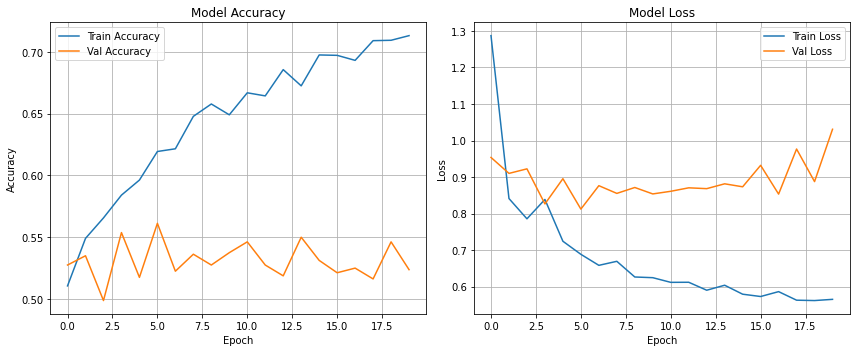

25/25 [==============================] - 0s 3ms/step

📈 Classification Report:
              precision    recall  f1-score   support

           0     0.5011    0.5838    0.5393       382
           1     0.5521    0.4689    0.5071       418

    accuracy                         0.5238       800
   macro avg     0.5266    0.5263    0.5232       800
weighted avg     0.5278    0.5238    0.5225       800

🧮 Confusion Matrix:


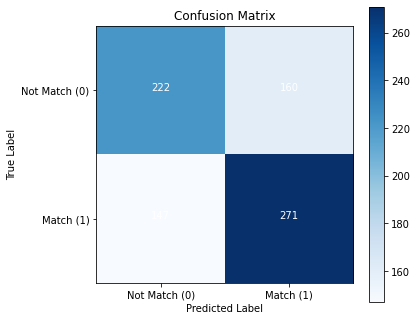


🔢 Additional Metrics:
Precision: 0.5521
Recall:    0.4689
F1 Score:  0.5071
Accuracy:  0.5238


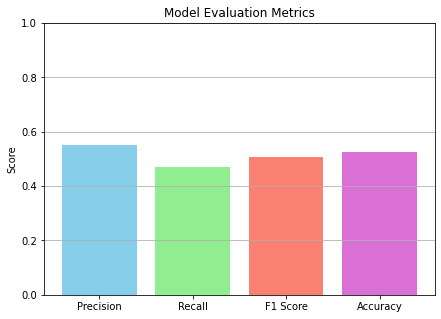

c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


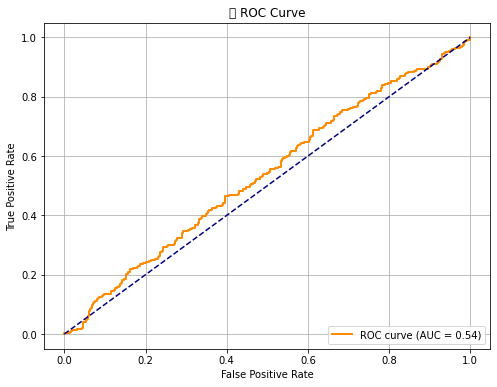

17/17 [==============================] - 0s 2ms/step

🔍 Test similarity scores with user 13:
Sample 1: 0.00% → ❌ Not a match
Sample 2: 0.00% → ❌ Not a match
Sample 3: 0.00% → ❌ Not a match
Sample 4: 0.00% → ❌ Not a match
Sample 5: 0.00% → ❌ Not a match
Sample 6: 0.00% → ❌ Not a match
Sample 7: 0.00% → ❌ Not a match
Sample 8: 0.00% → ❌ Not a match
Sample 9: 0.00% → ❌ Not a match
Sample 10: 0.00% → ❌ Not a match
Sample 11: 0.00% → ❌ Not a match
Sample 12: 0.00% → ❌ Not a match
Sample 13: 0.00% → ❌ Not a match
Sample 14: 0.00% → ❌ Not a match
Sample 15: 0.00% → ❌ Not a match
Sample 16: 0.00% → ❌ Not a match
Sample 17: 0.00% → ❌ Not a match
Sample 18: 0.00% → ❌ Not a match
Sample 19: 0.00% → ❌ Not a match
Sample 20: 0.00% → ❌ Not a match
Sample 21: 0.00% → ❌ Not a match
Sample 22: 0.00% → ❌ Not a match
Sample 23: 0.00% → ❌ Not a match
Sample 24: 0.00% → ❌ Not a match
Sample 25: 0.00% → ❌ Not a match
Sample 26: 0.00% → ❌ Not a match
Sample 27: 0.00% → ❌ Not a match
Sample 28: 0.00% → ❌ Not 

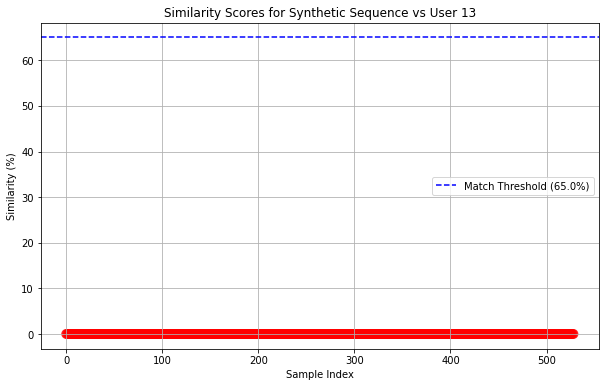

In [26]:
#Simease Neural Network Unbiased

import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --------------------------
# Prepare Data from pre-scaled df
# --------------------------
features = ['keystroke_hold_time', 'keystroke_release_time', 'Key_encoded']
grouped = df.groupby('user')
user_sequences = {}
step = 10

for user, group in grouped:
    data = group[features].values
    sequences = [data[i:i+step] for i in range(0, len(data) - step + 1, step)]
    if len(sequences) >= 2:
        user_sequences[user] = sequences

def create_pairs(user_sequences, max_pairs=1000):
    pairs, labels = [], []
    users = list(user_sequences.keys())

    for _ in range(max_pairs):
        user = random.choice(users)
        seqs = user_sequences[user]
        if len(seqs) >= 2:
            a, b = random.sample(seqs, 2)
            pairs.append([a, b])
            labels.append(1)

        user1, user2 = random.sample(users, 2)
        a = random.choice(user_sequences[user1])
        b = random.choice(user_sequences[user2])
        pairs.append([a, b])
        labels.append(0)

    return np.array(pairs), np.array(labels)

pairs, labels = create_pairs(user_sequences, max_pairs=2000)
max_len = max(max(len(p[0]), len(p[1])) for p in pairs)

X1 = pad_sequences([p[0] for p in pairs], maxlen=max_len, dtype='float32')
X2 = pad_sequences([p[1] for p in pairs], maxlen=max_len, dtype='float32')

X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(
    X1, X2, labels, test_size=0.2, random_state=42
)

# --------------------------
# Siamese Dense Model
# --------------------------
input_shape = (max_len, len(features))

def build_dense_branch(input_shape):
    inp = Input(shape=input_shape)
    x = Flatten()(inp)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    return Model(inputs=inp, outputs=x)

dense_branch = build_dense_branch(input_shape)

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

encoded_a = dense_branch(input_a)
encoded_b = dense_branch(input_b)

L1_layer = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))
L1_distance = L1_layer([encoded_a, encoded_b])

output = Dense(1, activation='sigmoid')(L1_distance)

model = Model(inputs=[input_a, input_b], outputs=output)
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.summary()

# --------------------------
# Train Model
# --------------------------
history = model.fit(
    [X1_train, X2_train], y_train,
    validation_data=([X1_test, X2_test], y_test),
    epochs=20,
    batch_size=32
)

model.save('siamese_dense_model_keystroke.h5')
# --------------------------
# Plot Accuracy and Loss
# --------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --------------------------
# Evaluation
# --------------------------
y_pred_prob = model.predict([X1_test, X2_test])
y_pred_class = (y_pred_prob > 0.5).astype(int).flatten()

print("\n📈 Classification Report:")
print(classification_report(y_test, y_pred_class, digits=4))
print("🧮 Confusion Matrix:")

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Match (0)', 'Match (1)'])
plt.yticks(tick_marks, ['Not Match (0)', 'Match (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)

print("\n🔢 Additional Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Accuracy:  {accuracy:.4f}")

# Bar Chart
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
scores = [precision, recall, f1, accuracy]
plt.figure(figsize=(7,5))
plt.bar(metrics, scores, color=['skyblue', 'lightgreen', 'salmon', 'orchid'])
plt.ylim(0,1)
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()

# --------------------------
# ROC Curve
# --------------------------
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📊 ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# --------------------------
# Synthetic Test Sequence Match
# --------------------------
target_user = 13
user_samples = user_sequences[target_user]
user_samples_padded = pad_sequences(user_samples, maxlen=max_len, dtype='float32')

# Use min/max from your already scaled data for synthetic sequence generation
scaled_feature_min = np.min(df[features].values, axis=0)
scaled_feature_max = np.max(df[features].values, axis=0)

random_sequence = np.array([
    [np.random.uniform(low, high) for low, high in zip(scaled_feature_min, scaled_feature_max)]
    for _ in range(step)
], dtype='float32')

new_sequence_padded = pad_sequences([random_sequence], maxlen=max_len, dtype='float32')[0]
test_batch = np.repeat(new_sequence_padded[None, :], len(user_samples_padded), axis=0)

similarities = model.predict([test_batch, user_samples_padded])
percentages = similarities.flatten() * 100
match_threshold = 65.0
match_count = sum(p >= match_threshold for p in percentages)

print(f"\n🔍 Test similarity scores with user {target_user}:")
for i, p in enumerate(percentages):
    verdict = "✅ Match" if p >= match_threshold else "❌ Not a match"
    print(f"Sample {i+1}: {p:.2f}% → {verdict}")

print("\n📊 Summary Report:")
print(f"Total samples compared: {len(percentages)}")
print(f"Matches found: {match_count}")
print(f"Match threshold: {match_threshold:.2f}%")

plt.figure(figsize=(10,6))
colors = ['green' if p >= match_threshold else 'red' for p in percentages]
plt.scatter(range(len(percentages)), percentages, c=colors, alpha=0.7, s=80)
plt.axhline(match_threshold, color='blue', linestyle='--', label=f'Match Threshold ({match_threshold}%)')
plt.title(f'Similarity Scores for Synthetic Sequence vs User {target_user}')
plt.xlabel('Sample Index')
plt.ylabel('Similarity (%)')
plt.legend()
plt.grid(True)
plt.show()



📊 Siamese Model Evaluation - Keystroke:
       Accuracy  Precision  Recall  F1 Score  ROC AUC
Dense    0.5238     0.5521  0.4689    0.5071   0.5370
LSTM     0.6538     0.7067  0.5766    0.6350   0.7108
GRU      0.6325     0.6342  0.7010    0.6659   0.6714


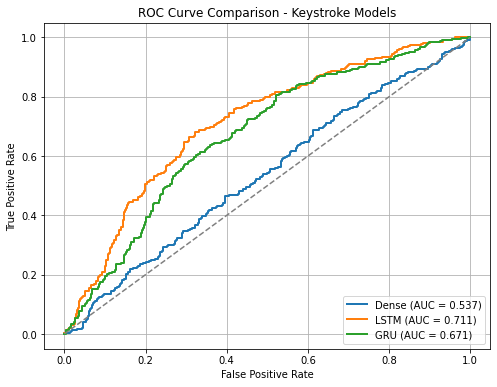

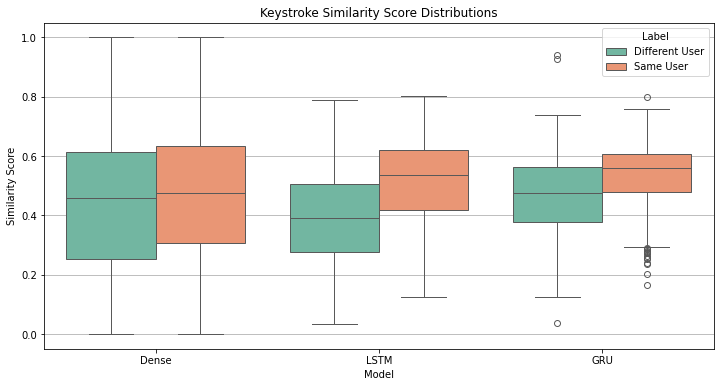

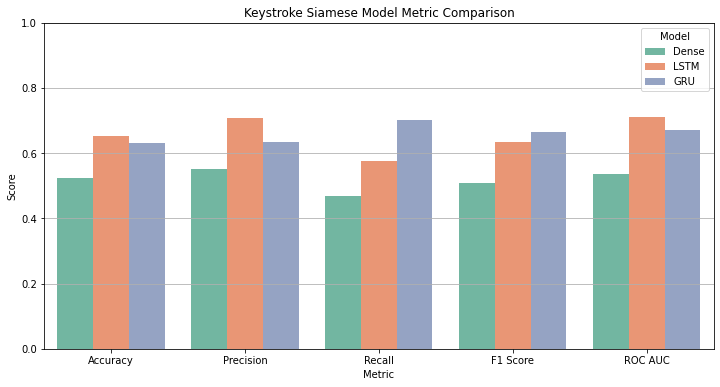

In [27]:
#Comparison of Siamse LSTM, Siamse GRU and Siamse Neural Network (dense)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import (
    roc_auc_score, roc_curve, accuracy_score,
    precision_score, recall_score, f1_score
)
from tensorflow.keras.models import load_model

# === Load Models === #
dense_model = load_model('siamese_dense_model_keystroke.h5', compile=True)
lstm_model = load_model('siamese_lstm_model_keystroke.h5', compile=True)
gru_model = load_model('siamese_gru_model_keystroke.h5', compile=True)

# === Prediction Function === #
def get_similarity_scores(model, X1, X2):
    return model.predict([X1, X2], verbose=0).flatten()

# === Load / Prepare Test Data === #
X1_test = np.array(X1_test)
X2_test = np.array(X2_test)
y_test = np.array(y_test)

# === Predict Scores === #
dense_sim = get_similarity_scores(dense_model, X1_test, X2_test)
lstm_sim = get_similarity_scores(lstm_model, X1_test, X2_test)
gru_sim = get_similarity_scores(gru_model, X1_test, X2_test)

# === Convert to Binary Predictions (Threshold 0.5) === #
dense_pred = (dense_sim >= 0.5).astype(int)
lstm_pred = (lstm_sim >= 0.5).astype(int)
gru_pred = (gru_sim >= 0.5).astype(int)

# === Evaluate Metrics === #
def compute_metrics(y_true, y_pred, y_score):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_score)
    }

metrics = {
    "Dense": compute_metrics(y_test, dense_pred, dense_sim),
    "LSTM": compute_metrics(y_test, lstm_pred, lstm_sim),
    "GRU": compute_metrics(y_test, gru_pred, gru_sim)
}

# === Print Metric Table === #
df_metrics = pd.DataFrame(metrics).T
print("\n📊 Siamese Model Evaluation - Keystroke:")
print(df_metrics.round(4))

# === ROC Curve === #
plt.figure(figsize=(8, 6))
for name, sim_scores in zip(['Dense', 'LSTM', 'GRU'], [dense_sim, lstm_sim, gru_sim]):
    fpr, tpr, _ = roc_curve(y_test, sim_scores)
    auc = roc_auc_score(y_test, sim_scores)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve Comparison - Keystroke Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# === Boxplot of Similarity Scores === #
data = []
for model_name, sim_scores in zip(['Dense', 'LSTM', 'GRU'], [dense_sim, lstm_sim, gru_sim]):
    for label in [0, 1]:
        label_name = 'Same User' if label == 1 else 'Different User'
        data.extend([
            {'Model': model_name, 'Label': label_name, 'Similarity': score}
            for score in sim_scores[y_test == label]
        ])

df1 = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Similarity', hue='Label', data=df1, palette='Set2')
plt.title('Keystroke Similarity Score Distributions')
plt.ylabel('Similarity Score')
plt.grid(True, axis='y')
plt.show()

# === Bar Plot for All Metrics === #
df_melt = df_metrics.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='index', data=df_melt, palette='Set2')
plt.title('Keystroke Siamese Model Metric Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.legend(title='Model')
plt.show()


Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 10, 3)]      0           []                               
                                                                                                  
 input_15 (InputLayer)          [(None, 10, 3)]      0           []                               
                                                                                                  
 model_8 (Functional)           (None, 64)           17408       ['input_14[0][0]',               
                                                                  'input_15[0][0]']               
                                                                                                  
 lambda_4 (Lambda)              (None, 64)           0           ['model_8[0][0]',          

c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


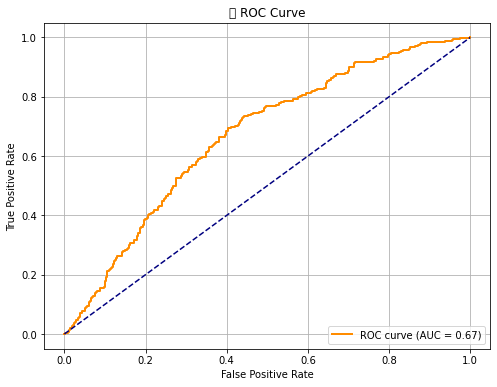

34/34 [==============================] - 1s 4ms/step

🔍 Noise STD: 0.01
Accuracy: 0.47, Mean Similarity: 53.23%
34/34 [==============================] - 0s 5ms/step

🔍 Noise STD: 0.02
Accuracy: 0.47, Mean Similarity: 53.19%
34/34 [==============================] - 0s 5ms/step

🔍 Noise STD: 0.03
Accuracy: 0.47, Mean Similarity: 53.17%
34/34 [==============================] - 0s 5ms/step

🔍 Noise STD: 0.04
Accuracy: 0.47, Mean Similarity: 53.14%
34/34 [==============================] - 0s 5ms/step

🔍 Noise STD: 0.05
Accuracy: 0.47, Mean Similarity: 53.08%
34/34 [==============================] - 0s 5ms/step

🔍 Noise STD: 0.06
Accuracy: 0.47, Mean Similarity: 53.06%
34/34 [==============================] - 0s 6ms/step

🔍 Noise STD: 0.07
Accuracy: 0.47, Mean Similarity: 53.02%
34/34 [==============================] - 0s 5ms/step

🔍 Noise STD: 0.08
Accuracy: 0.47, Mean Similarity: 52.98%
34/34 [==============================] - 0s 5ms/step

🔍 Noise STD: 0.09
Accuracy: 0.47, Mean Similarity:

C:\Users\88019\AppData\Local\Temp\ipykernel_16096\37018944.py:175: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


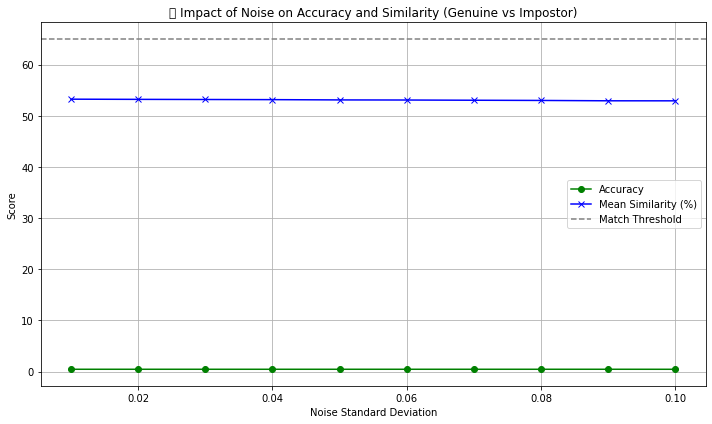

In [28]:
# --- Your existing imports ---
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- Prepare Data ---
features = ['keystroke_hold_time', 'keystroke_release_time', 'Key_encoded']
grouped = df.groupby('user')
user_sequences = {}
step = 10

for user, group in grouped:
    data = group[features].values
    sequences = [data[i:i+step] for i in range(0, len(data) - step + 1, step)]
    if len(sequences) >= 2:
        user_sequences[user] = sequences

def create_pairs(user_sequences, max_pairs=1000):
    pairs = []
    labels = []
    users = list(user_sequences.keys())

    for _ in range(max_pairs):
        user = random.choice(users)
        seqs = user_sequences[user]
        if len(seqs) >= 2:
            a, b = random.sample(seqs, 2)
            pairs.append([a, b])
            labels.append(1)

        user1, user2 = random.sample(users, 2)
        a = random.choice(user_sequences[user1])
        b = random.choice(user_sequences[user2])
        pairs.append([a, b])
        labels.append(0)

    return np.array(pairs), np.array(labels)

pairs, labels = create_pairs(user_sequences, max_pairs=2000)

# Padding
max_len = max(max(len(p[0]), len(p[1])) for p in pairs)
X1 = pad_sequences([p[0] for p in pairs], maxlen=max_len, dtype='float32')
X2 = pad_sequences([p[1] for p in pairs], maxlen=max_len, dtype='float32')

# Train-test split
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(
    X1, X2, labels, test_size=0.2, random_state=42
)

# --- Siamese Model ---
input_shape = (max_len, len(features))

def build_lstm_branch(input_shape):
    inp = Input(shape=input_shape)
    x = LSTM(64)(inp)
    return Model(inputs=inp, outputs=x)

lstm_branch = build_lstm_branch(input_shape)
input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)
encoded_a = lstm_branch(input_a)
encoded_b = lstm_branch(input_b)
L1_layer = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))
L1_distance = L1_layer([encoded_a, encoded_b])
output = Dense(1, activation='sigmoid')(L1_distance)
model = Model(inputs=[input_a, input_b], outputs=output)
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.summary()

# --- Train ---
history = model.fit(
    [X1_train, X2_train], y_train,
    validation_data=([X1_test, X2_test], y_test),
    epochs=20,
    batch_size=32
)

# --- Evaluate Standard Test Set ---
y_pred_prob = model.predict([X1_test, X2_test])
y_pred_class = (y_pred_prob > 0.5).astype(int).flatten()
print("\n📈 Classification Report:")
print(classification_report(y_test, y_pred_class, digits=4))
print("🧮 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)
print("\n🔢 Additional Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Accuracy:  {accuracy:.4f}")

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📊 ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# --- Accuracy & Similarity vs Noise STD (Option A) ---
target_user = 13
match_threshold = 65.0
noise_levels = np.round(np.linspace(0.01, 0.1, 10), 3)
accuracies = []
mean_similarities = []

genuine_sequences = user_sequences[target_user]
impostor_sequences = []
for uid, seqs in user_sequences.items():
    if uid != target_user:
        impostor_sequences.extend(seqs)
random.shuffle(impostor_sequences)
impostor_sequences = impostor_sequences[:len(genuine_sequences)]

genuine_sequences = pad_sequences(genuine_sequences, maxlen=max_len, dtype='float32')
impostor_sequences = pad_sequences(impostor_sequences, maxlen=max_len, dtype='float32')

for noise_std in noise_levels:
    noisy_genuine = []
    for seq in genuine_sequences:
        noise = np.random.normal(0, noise_std, seq.shape)
        noisy_seq = seq + noise
        noisy_genuine.append(noisy_seq)
    noisy_genuine = np.array(noisy_genuine)

    # Create test pairs: genuine vs genuine (label 1) and noisy vs impostor (label 0)
    test_pairs_1 = [noisy_genuine, genuine_sequences]
    test_pairs_0 = [noisy_genuine, impostor_sequences]
    test_labels_1 = np.ones(len(genuine_sequences))
    test_labels_0 = np.zeros(len(impostor_sequences))

    test_X1 = np.concatenate([test_pairs_1[0], test_pairs_0[0]])
    test_X2 = np.concatenate([test_pairs_1[1], test_pairs_0[1]])
    test_labels = np.concatenate([test_labels_1, test_labels_0])

    preds = model.predict([test_X1, test_X2]).flatten()
    preds_class = (preds * 100 >= match_threshold).astype(int)
    acc = accuracy_score(test_labels, preds_class)
    mean_sim = np.mean(preds * 100)

    accuracies.append(acc)
    mean_similarities.append(mean_sim)

    print(f"\n🔍 Noise STD: {noise_std}")
    print(f"Accuracy: {acc:.2f}, Mean Similarity: {mean_sim:.2f}%")

# --- Plot: Accuracy & Similarity vs Noise STD ---
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, accuracies, marker='o', label='Accuracy', color='green')
plt.plot(noise_levels, mean_similarities, marker='x', label='Mean Similarity (%)', color='blue')
plt.axhline(match_threshold, color='gray', linestyle='--', label='Match Threshold')
plt.title('📉 Impact of Noise on Accuracy and Similarity (Genuine vs Impostor)')
plt.xlabel('Noise Standard Deviation')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 10, 3)]      0           []                               
                                                                                                  
 input_18 (InputLayer)          [(None, 10, 3)]      0           []                               
                                                                                                  
 model_10 (Functional)          (None, 64)           17408       ['input_17[0][0]',               
                                                                  'input_18[0][0]']               
                                                                                                  
 lambda_5 (Lambda)              (None, 64)           0           ['model_10[0][0]',        

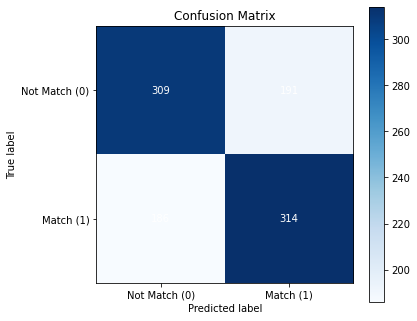


🔢 Additional Metrics:
Precision: 0.6218
Recall:    0.6280
F1 Score:  0.6249
Accuracy:  0.6230


c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


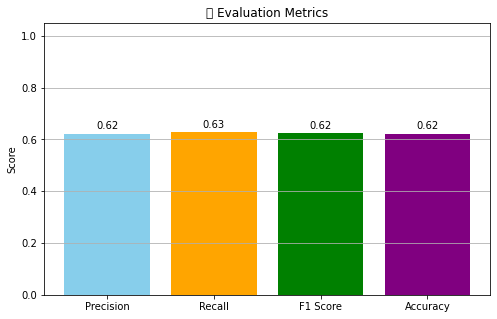

C:\Users\88019\AppData\Local\Temp\ipykernel_16096\3516337895.py:206: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\88019\AppData\Local\Temp\ipykernel_16096\3516337895.py:206: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


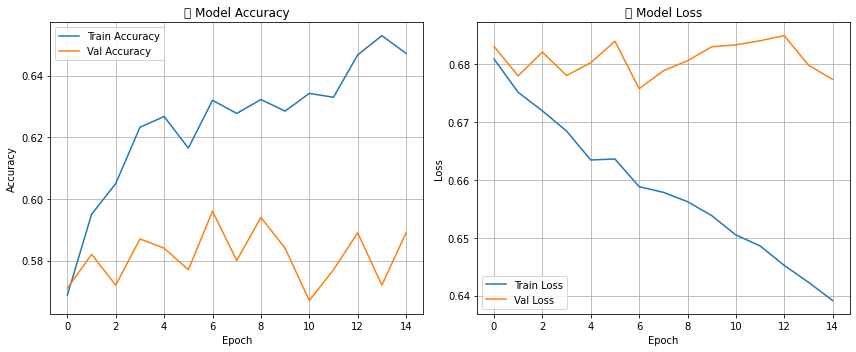

c:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


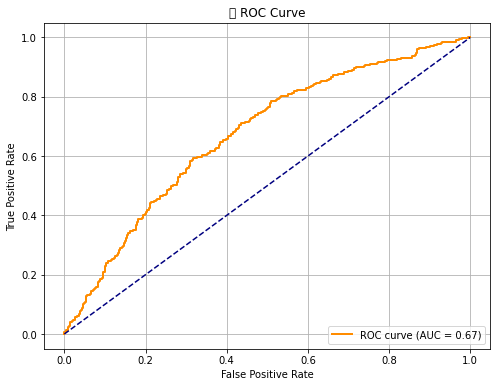

In [29]:
#Siamese lstm 80% train, 10% valid, and 10% test
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --------------------------
# Load & Process Data
# --------------------------
features = ['keystroke_hold_time', 'keystroke_release_time', 'Key_encoded']
grouped = df.groupby('user')
user_sequences = {}
step = 10

for user, group in grouped:
    data = group[features].values
    sequences = [data[i:i+step] for i in range(0, len(data) - step + 1, step)]
    if len(sequences) >= 2:
        user_sequences[user] = sequences

# Split user_sequences into train/val/test
train_users, testval_users = train_test_split(list(user_sequences.keys()), test_size=0.2, random_state=42)
val_users, test_users = train_test_split(testval_users, test_size=0.5, random_state=42)

def filter_user_sequences(user_list):
    return {user: user_sequences[user] for user in user_list if user in user_sequences}

train_user_sequences = filter_user_sequences(train_users)
val_user_sequences = filter_user_sequences(val_users)
test_user_sequences = filter_user_sequences(test_users)

def create_pairs(user_sequences, max_pairs=1000):
    pairs = []
    labels = []
    users = list(user_sequences.keys())

    for _ in range(max_pairs):
        # Positive pair
        user = random.choice(users)
        seqs = user_sequences[user]
        if len(seqs) >= 2:
            a, b = random.sample(seqs, 2)
            pairs.append([a, b])
            labels.append(1)

        # Negative pair
        user1, user2 = random.sample(users, 2)
        a = random.choice(user_sequences[user1])
        b = random.choice(user_sequences[user2])
        pairs.append([a, b])
        labels.append(0)

    return np.array(pairs), np.array(labels)

train_pairs, train_labels = create_pairs(train_user_sequences, max_pairs=2000)
val_pairs, val_labels = create_pairs(val_user_sequences, max_pairs=500)
test_pairs, test_labels = create_pairs(test_user_sequences, max_pairs=500)

# Padding
all_pairs = np.concatenate([train_pairs, val_pairs, test_pairs], axis=0)
max_len = max(max(len(p[0]), len(p[1])) for p in all_pairs)

def pad_pair_data(pairs):
    X1 = pad_sequences([p[0] for p in pairs], maxlen=max_len, dtype='float32')
    X2 = pad_sequences([p[1] for p in pairs], maxlen=max_len, dtype='float32')
    return X1, X2

X1_train, X2_train = pad_pair_data(train_pairs)
X1_val, X2_val = pad_pair_data(val_pairs)
X1_test, X2_test = pad_pair_data(test_pairs)

# --------------------------
# Siamese LSTM Model
# --------------------------
input_shape = (max_len, len(features))

def build_lstm_branch(input_shape):
    inp = Input(shape=input_shape)
    x = LSTM(64)(inp)
    return Model(inputs=inp, outputs=x)

lstm_branch = build_lstm_branch(input_shape)

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

encoded_a = lstm_branch(input_a)
encoded_b = lstm_branch(input_b)

L1_layer = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))
L1_distance = L1_layer([encoded_a, encoded_b])

output = Dense(1, activation='sigmoid')(L1_distance)

model = Model(inputs=[input_a, input_b], outputs=output)
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

model.summary()

# --------------------------
# Train the Model
# --------------------------
history = model.fit(
    [X1_train, X2_train],
    train_labels,
    validation_data=([X1_val, X2_val], val_labels),
    epochs=15,
    batch_size=32
)

model.save('siamese_lstm_model_keystroke.h5')

# --------------------------
# Evaluate Model
# --------------------------
y_pred_prob = model.predict([X1_test, X2_test])
y_pred_class = (y_pred_prob > 0.5).astype(int).flatten()

print("\n📈 Classification Report:")
print(classification_report(test_labels, y_pred_class, digits=4))

cm = confusion_matrix(test_labels, y_pred_class)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Match (0)', 'Match (1)'])
plt.yticks(tick_marks, ['Not Match (0)', 'Match (1)'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add numbers inside the squares
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.grid(False)
plt.show()

# Additional Metrics
precision = precision_score(test_labels, y_pred_class)
recall = recall_score(test_labels, y_pred_class)
f1 = f1_score(test_labels, y_pred_class)
accuracy = accuracy_score(test_labels, y_pred_class)

print("\n🔢 Additional Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Accuracy:  {accuracy:.4f}")

# --------------------------
# Bar Chart: Evaluation Metrics
# --------------------------
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values = [precision, recall, f1, accuracy]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['skyblue', 'orange', 'green', 'purple'])
plt.ylim(0, 1.05)
plt.title('📊 Evaluation Metrics')
plt.ylabel('Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')
plt.grid(axis='y')
plt.show()

# --------------------------
# Accuracy & Loss Curves
# --------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('📈 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('📉 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --------------------------
# ROC Curve
# --------------------------
fpr, tpr, _ = roc_curve(test_labels, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📊 ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
